In [1]:
# Generates XRD figures from imported file directory

In [1]:
# import packages
import numpy as np
import pandas as pd
import os, os.path
import glob
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.ticker as tick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

%matplotlib notebook

In [2]:
# function that creates a list of files in a given folder

def file_dict(file_DIR):
    #if you want to specify a file type, replace "/*" with "/*.extension"
    list_files = glob.glob(file_DIR + "/*")
    return list_files

In [3]:
# assign directories

cell3_operando = \
"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell3_Li3InCl6/operando_cell3/extracted_cell3_operando/extracted_d1400_cell3_operando"

cell4_operando_50uA = \
"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/operando_cell4/extracted_d1400_cell4_operando_50uA/xye"

cell4_operando_100uA = \
"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell4_Li2-9In0-9Zr0-1Cl6/operando_cell4/extracted_d1400_cell4_operando_100uA/xye"

cell5_operando = \
"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/operando_cell5_100uA/extracted_d1400_cell5_100uA/xye"

cell6_operando = \
"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell6_Li2-7Sc0-7Zr0-3Cl6/operando_cell6/extracted_d1400_cell6_operando/xye"

cell10_operando = \
"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell10_Li2-7Sc0-7Zr0-3Cl6/operando_cell10/extracted_d1400_cell10_operando"

In [4]:
# set working directory
current_dir = file_dict(cell5_operando)

Q_var_dict = {}
signal_var_dict = {}
err_var_dict = {}

for i in current_dir:
    #create dictionary of Q-value variable names
    globals()[f"Q_{i}"] = f"Q_{i}"
    Q_var_dict[i] = "Q"+str(i)
    
    #create dictionary of signal variable names
    globals()[f"signal_{i}"] = f"signal_{i}"
    signal_var_dict[i] = "signal"+str(i)
    
    #create dictionary of error variable names
    globals()[f"err_{i}"] = f"err_{i}"
    err_var_dict[i] = "err"+str(i)
    
# assign variable names
for i in range(0, len(Q_var_dict)):
    Q_var_dict[i], signal_var_dict[i], err_var_dict[i] = \
        np.loadtxt(current_dir[i], unpack=True, dtype=float, skiprows=3)

<IPython.core.display.Javascript object>


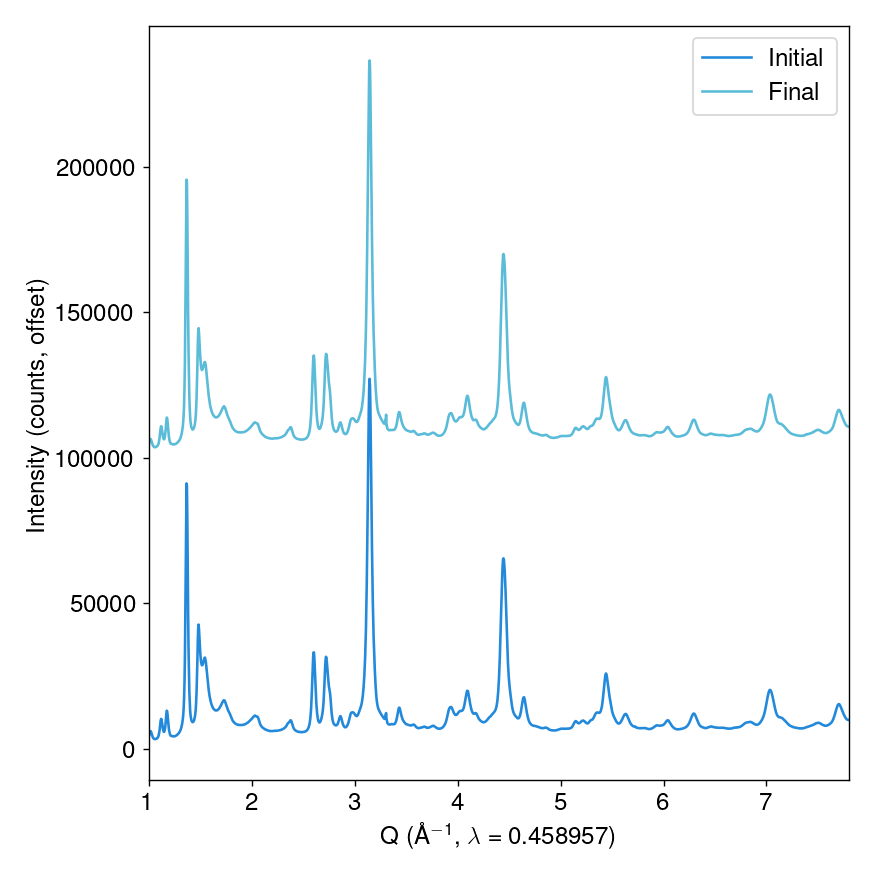

In [6]:
plt.figure(figsize=(7,7))

# plot data
plt.plot(Q_var_dict[0], signal_var_dict[0], label="Initial", color="#2389da")
plt.plot(Q_var_dict[15], signal_var_dict[15]+100000, label="Final", color="#5abcd8")
#plt.plot(Q_var_dict[0], abs(signal_var_dict[0]-signal_var_dict[15])-10000, label="Difference", color="#BEBEBE")

# set axis limits
plt.xlim(1,7.8)
#plt.ylim(-15000, 280000)

# x-axis label
plt.xlabel("Q (\AA" r"$^{-1}$, $\lambda=0.458957$" ")")

# y-axis label
plt.ylabel("Intensity (counts, offset)")

# set title
#plt.text(1.05, 273000, "Cell 10, Li$_{2.7}$Sc$_{0.7}$Zr$_{0.3}$Cl$_6$")

plt.legend()
plt.tight_layout()

# saves PNG image of figure
# plt.savefig("C:/Users/sincl/Desktop/cell10_XRD.png",bbox_inches='tight',dpi=1000)